In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Build model using LinearRegression

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
cars.columns

Index(['engine-size', 'horsepower', 'city-mpg', 'price', 'fuel-type_diesel',
       'fuel-type_gas', 'num-of-doors_four', 'num-of-doors_two',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [4]:
cars.head()

,engine-size,horsepower,city-mpg,price,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,21,13495.0,0,1,0,1,1,0,0,0,0,0,0,1
1,130,111.0,21,16500.0,0,1,0,1,1,0,0,0,0,0,0,1
2,152,154.0,19,16500.0,0,1,0,1,0,0,1,0,0,0,0,1
3,109,102.0,24,13950.0,0,1,1,0,0,0,0,1,0,0,1,0
4,136,115.0,18,17450.0,0,1,1,0,0,0,0,1,0,1,0,0


In [5]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [6]:
X.shape,y.shape

((201, 15), (201,))

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [9]:
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]}")

engine-size               98.10937882922944
horsepower                66.80342477483471
city-mpg                  -72.99584844332975
fuel-type_diesel          1154.0124486992331
fuel-type_gas             -1154.012448699232
num-of-doors_four         127.56246118535555
num-of-doors_two          -127.56246118535505
body-style_convertible    3217.801133380999
body-style_hardtop        -2776.3025884873764
body-style_hatchback      -530.10564095205
body-style_sedan          775.1357246406261
body-style_wagon          -948.9876698050715
drive-wheels_4wd          231.02956441893707
drive-wheels_fwd          -814.9889511680782
drive-wheels_rwd          811.5316218480828


In [10]:
model.intercept_

-3305.0644914339955

### Calculate accuracy with train data

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,y_pred)))

3110.6091813667554


In [15]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.82


### Test with test data

In [16]:
y_pred = model.predict(X_test)

In [17]:
## get MSE 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 17211038.19
Mean Absolute Error : 3004.61
R2 Score: 0.80


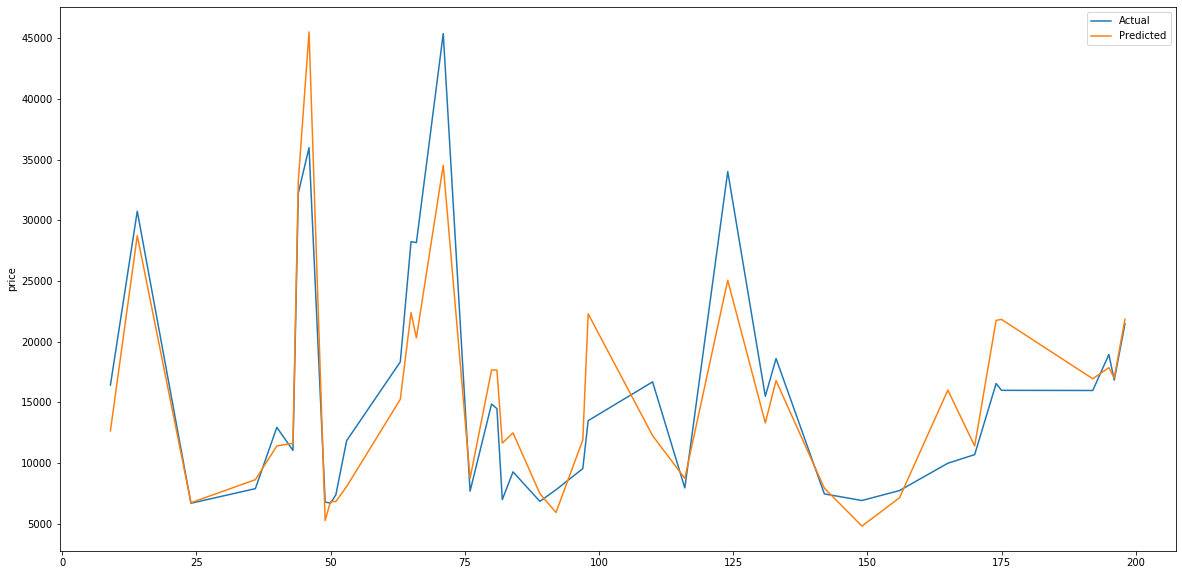

In [18]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [19]:
for p,a in zip(y_pred,y_test):
    print(f"{p:.2f}  -  {a:.2f}")

34543.73  -  45400.00
6738.24  -  6692.00
6836.35  -  7395.00
21766.92  -  16558.00
11910.80  -  9549.00
11415.91  -  12945.00
25069.19  -  34028.00
12490.96  -  9279.00
7934.32  -  7463.00
13315.33  -  15510.00
16801.49  -  18620.00
16016.05  -  9989.00
4809.51  -  6918.00
7145.75  -  7738.00
8745.03  -  7957.00
21865.81  -  21485.00
17025.26  -  16845.00
22299.62  -  13499.00
8068.66  -  11845.00
16952.27  -  15985.00
12664.08  -  16430.00
45537.24  -  36000.00
17866.47  -  18950.00
5275.98  -  6795.00
6836.35  -  6695.00
20321.54  -  28176.00
12263.56  -  16695.00
21839.92  -  15998.00
33229.84  -  32250.00
22403.98  -  28248.00
11630.21  -  11048.00
8634.50  -  7895.00
17672.90  -  14869.00
15256.81  -  18344.00
5931.44  -  7799.00
28750.30  -  30760.00
7491.81  -  6849.00
8745.03  -  7689.00
11415.46  -  10698.00
17672.90  -  14489.00
11651.78  -  6989.00


### Micro model with 2 features 

In [20]:
# Micro model
X_micro =  X[['engine-size','city-mpg']]
y_micro =  y

In [21]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [22]:
micro_model = LinearRegression(normalize=True)
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [23]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7754615970810945

In [24]:
y_micro_pred = micro_model.predict(X_micro_test)

In [25]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.81


## Regularization 

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

In [27]:
lm = LassoCV(alphas=[0.10,0.5,1.0], cv=5, normalize=True)
lm.fit(X,y)

LassoCV(alphas=[0.1, 0.5, 1.0], copy_X=True, cv=5, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=True, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [29]:
# Display coefficient for each column
for t in zip(X_train.columns, lm.coef_):
  print(f"{t[0]:25s} {t[1]}")

engine-size               94.90192356563755
horsepower                51.84457401896925
city-mpg                  -130.26334357430622
fuel-type_diesel          3025.7156531830283
fuel-type_gas             -1.197461207360927e-11
num-of-doors_four         355.97541408794484
num-of-doors_two          -0.0
body-style_convertible    2802.665990293213
body-style_hardtop        455.6302334363587
body-style_hatchback      -1216.1885874637012
body-style_sedan          0.0
body-style_wagon          -1091.0168097273513
drive-wheels_4wd          0.0
drive-wheels_fwd          -784.9444260913275
drive-wheels_rwd          1250.0912458063178


In [30]:
y_pred = lm.predict(X_test)

In [31]:
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.87


## RandomForestRegressor 

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('Train score ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Train score  0.9763870088593243
R2 Score: 0.95


d:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


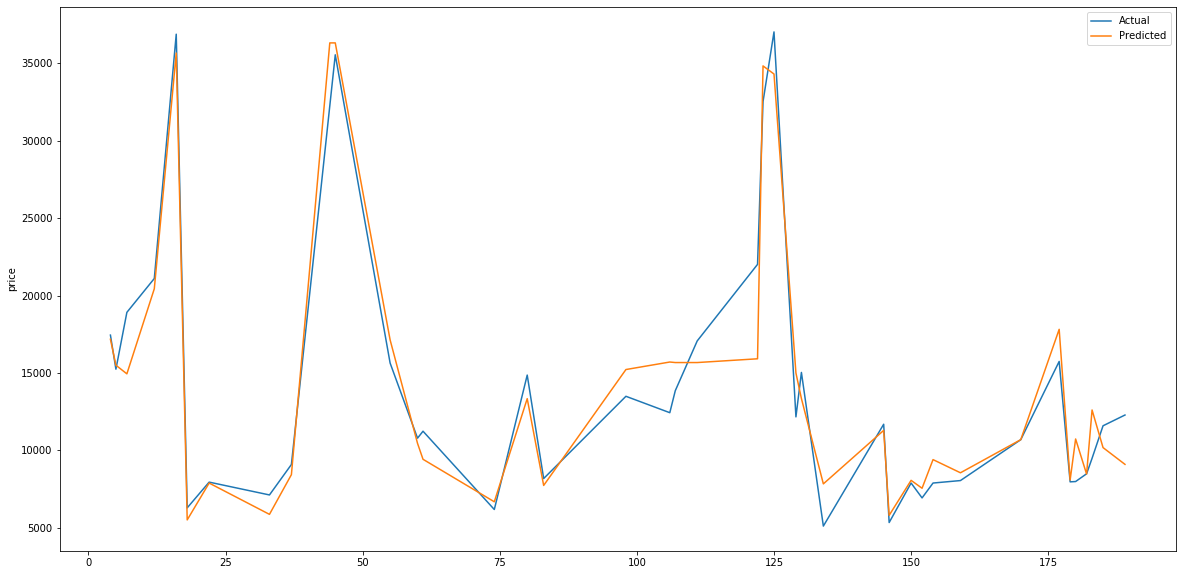

In [18]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [2]:
cars = pd.read_csv("final_cars.csv")

In [8]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [99]:
cars.head()

,engine-size,horsepower,city-mpg,highway-mpg,price,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,21,27,13495.0,0,1,0,1,1,0,0,0,0,0,0,1
1,130,111.0,21,27,16500.0,0,1,0,1,1,0,0,0,0,0,0,1
2,152,154.0,19,26,16500.0,0,1,0,1,0,0,1,0,0,0,0,1
3,109,102.0,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0
4,136,115.0,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0


In [4]:
# create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [5]:
## scale values
from sklearn.preprocessing import scale
X['engine-size'] = scale(X['engine-size'])
X['horsepower'] = scale(X['horsepower'])
X['city-mpg'] = scale(X['city-mpg'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [13]:
model = SGDRegressor(random_state=100, penalty="l1")
model.fit(X_train,y_train)
print('Train score ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Train score  0.8246795170649844
R2 Score: 0.82
